In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
!pip install ucimlrepo


[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
from sklearn.ensemble import IsolationForest
#predefined dataset uci
from ucimlrepo import fetch_ucirepo


In [6]:
#load the datasets
air_quality=fetch_ucirepo(id=360)
air_quality

{'data': {'ids': None,
  'features':            Date      Time  CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  \
  0     3/10/2004  18:00:00     2.6         1360       150      11.9   
  1     3/10/2004  19:00:00     2.0         1292       112       9.4   
  2     3/10/2004  20:00:00     2.2         1402        88       9.0   
  3     3/10/2004  21:00:00     2.2         1376        80       9.2   
  4     3/10/2004  22:00:00     1.6         1272        51       6.5   
  ...         ...       ...     ...          ...       ...       ...   
  9352   4/4/2005  10:00:00     3.1         1314      -200      13.5   
  9353   4/4/2005  11:00:00     2.4         1163      -200      11.4   
  9354   4/4/2005  12:00:00     2.4         1142      -200      12.4   
  9355   4/4/2005  13:00:00     2.1         1003      -200       9.5   
  9356   4/4/2005  14:00:00     2.2         1071      -200      11.9   
  
        PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  \
  0              1046      

In [7]:


# get features dataframe
df = air_quality.data.features   # (sometimes .data.features depending on version)

print(df)


           Date      Time  CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  \
0     3/10/2004  18:00:00     2.6         1360       150      11.9   
1     3/10/2004  19:00:00     2.0         1292       112       9.4   
2     3/10/2004  20:00:00     2.2         1402        88       9.0   
3     3/10/2004  21:00:00     2.2         1376        80       9.2   
4     3/10/2004  22:00:00     1.6         1272        51       6.5   
...         ...       ...     ...          ...       ...       ...   
9352   4/4/2005  10:00:00     3.1         1314      -200      13.5   
9353   4/4/2005  11:00:00     2.4         1163      -200      11.4   
9354   4/4/2005  12:00:00     2.4         1142      -200      12.4   
9355   4/4/2005  13:00:00     2.1         1003      -200       9.5   
9356   4/4/2005  14:00:00     2.2         1071      -200      11.9   

      PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  \
0              1046      166          1056      113          1692   
1               955  

Data Processing Steps

In [8]:
df1=df[['CO(GT)','C6H6(GT)','NOx(GT)','NO2(GT)']]
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,3/10/2004,18:00:00,2.6,1360,150,11.9,1046,166,1056,113,1692,1268,13.6,48.9,0.7578
1,3/10/2004,19:00:00,2.0,1292,112,9.4,955,103,1174,92,1559,972,13.3,47.7,0.7255
2,3/10/2004,20:00:00,2.2,1402,88,9.0,939,131,1140,114,1555,1074,11.9,54.0,0.7502
3,3/10/2004,21:00:00,2.2,1376,80,9.2,948,172,1092,122,1584,1203,11.0,60.0,0.7867
4,3/10/2004,22:00:00,1.6,1272,51,6.5,836,131,1205,116,1490,1110,11.2,59.6,0.7888


In [9]:
df1.isnull().sum()

CO(GT)      0
C6H6(GT)    0
NOx(GT)     0
NO2(GT)     0
dtype: int64

In [10]:
df1


,CO(GT),C6H6(GT),NOx(GT),NO2(GT)
0,2.6,11.9,166,113
1,2.0,9.4,103,92
2,2.2,9.0,131,114
3,2.2,9.2,172,122
4,1.6,6.5,131,116
...,...,...,...,...
9352,3.1,13.5,472,190
9353,2.4,11.4,353,179
9354,2.4,12.4,293,175
9355,2.1,9.5,235,156


In [11]:
df1.dtypes


CO(GT)      float64
C6H6(GT)    float64
NOx(GT)       int64
NO2(GT)       int64
dtype: object

In [12]:
#parameters for isolation forest
n_estimators=100 # number of trees in the forest
contamination=0.01  #percentage of outliers in the data
sample_size=256

In [18]:
# Train the isolation forest model
model = IsolationForest(n_estimators=n_estimators,
contamination=contamination, max_samples=sample_size,
random_state=42)

In [25]:
import pandas as pd

# Combine Date and Time into one datetime column
df['Datetime'] = pd.to_datetime(
    df['Date'] + ' ' + df['Time'],
    format='%d/%m/%Y %H.%M.%S',
    errors='coerce'
)


In [33]:
model.fit(df1)
# Predict anomalies
anomaly_labels = model.predict(df1)
# anomaly_labels will be -1 for anomalies and 1 for normal data points
anomaly_labels

# Add anomaly labels to the original dataframe
df1['anomaly']=anomaly_labels

In [32]:
df1['anomaly'].value_counts()

anomaly
 1    9263
-1      94
Name: count, dtype: int64

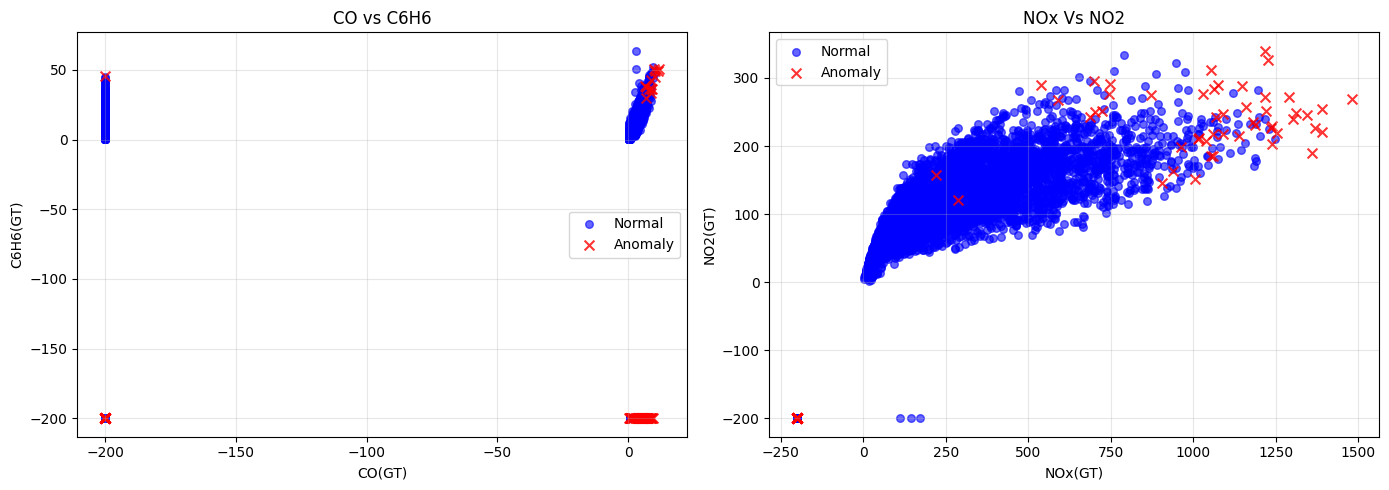

Normal data points: 9263
Anomalies detected: 94


In [ ]:
# Visualize anomalies - Multiple feature comparisons
fig, axes=plt.subplots(1,2, figsize=(14,5))
normal=df1[df1['anomaly']==1]
anomaly_labels=df1[df1['anomaly']==-1]

# Plot 1: CO vs C6H6
axes[0].scatter(normal['CO(GT)'], normal['C6H6(GT)'], color='blue',
label='Normal', alpha=0.6, s=30)
axes[0].scatter(anomaly['CO(GT)'], anomaly['C6H6(GT)'], color='red',
label='Anomaly', alpha=0.8, s=50, marker='x')
axes[0].set_xlabel('CO(GT)')
axes[0].set_ylabel('C6H6(GT)')
axes[0].set_title('CO vs C6H6')
axes[0].legend ()
axes[0].grid(True, alpha=0.3)

# Plot 2: NOx vs NO2
axes[1].scatter(normal['NOx(GT)'], normal['NO2(GT)'], color='blue',
label='Normal', alpha=0.6, s=30)
axes[1].scatter(anomaly['NOx(GT)'], anomaly['NO2(GT)'], color='red',
label='Anomaly', alpha=0.8, s=50, marker='x' )
axes[1].set_xlabel('NOx(GT)')
axes[1].set_ylabel('NO2(GT)')
axes[1].set_title('NOx Vs NO2')
axes[1].legend ()
axes[1].grid(True, alpha=0.3)


plt.tight_layout()
plt.show()
 
print(f"Normal data points: {len(normal)}")
print(f"Anomalies detected: {len(anomaly)}")

In [55]:
import joblib
model_path = "C:/Users/lekha/OneDrive/Documents/Tekworks/Machine_Learning/17-02-26/isolation_forest_model.pkl"
joblib.dump(model, model_path)


['C:/Users/lekha/OneDrive/Documents/Tekworks/Machine_Learning/17-02-26/isolation_forest_model.pkl']

In [41]:
# saved model
import joblib
joblib.dump(model, 'isolation_forest_air_quality.pkl')


['isolation_forest_air_quality.pkl']